In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch
import torch.optim

# CODE FILES HERE
from examples.vae.vae import Encoder, Decoder, Vae, PATH
from solver import Solver
from dataloader import DataLoader
from plot import plot_losses, plot_gaussian_distributions, plot_rl_kl, plot_latent_space, plot_latent_space_no_labels, \
plot_latent_manifold, plot_faces_grid, plot_faces_samples_grid

%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting device on GPU if available, else CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda:0

Tesla K80
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [3]:
batch_size = 128
optimizer = torch.optim.Adam

In [4]:
# Choose the dataset and tune hyperparameters here!
dataset = "LFW"

if dataset == "MNIST" or dataset == "EMNIST":
    epochs = 1000
    hidden_dim = 500 # Kingma, Welling use 500 neurons, otherwise use 400
    z_dim = 20
    step_config = {
        "step_size" : -1,
        "gamma" : 0.1
    }
    optim_config = {
        "lr": 1e-3,
        "weight_decay": 0
    }
elif dataset == "LFW":
    epochs = 500
    hidden_dim = 700 # 200 in Kingma for Frey Face but we have highly varying data!
    z_dim = 2
    step_config = {
        "step_size" : 50,
        "gamma" : 0.1
    }
    optim_config = {
        "lr": 1e-2,
        "weight_decay": 1e-5
    }
elif dataset == "FF":
    epochs = 100 # 200 for zdim=20, 500 for zdim=2
    hidden_dim = 200 # as in Kingma
    z_dim = 2
    step_config = {
        "step_size" : 100,
        "gamma" : 0.1
    }
    optim_config = {
        "lr": 1e-3,
        "weight_decay": 0
    }

In [5]:
data_loader = DataLoader(PATH, batch_size, dataset, z_dim)
encoder = Encoder(data_loader.input_dim, hidden_dim, z_dim)
decoder = Decoder(z_dim, hidden_dim, data_loader.input_dim)
model = Vae(encoder, decoder)

In [6]:
solver = Solver(model, data_loader, optimizer, z_dim, epochs, step_config, optim_config)
solver.run()

+++++ START RUN +++++
====> Epoch: 1 train set loss avg: 1242.5313
====> Test set loss avg: 1232.0132
1.8446290493011475 seconds for epoch 1
====> Epoch: 2 train set loss avg: 1222.5219
====> Test set loss avg: 1231.9149
1.7788269519805908 seconds for epoch 2
====> Epoch: 3 train set loss avg: 1221.5871
====> Test set loss avg: 1235.6811
1.741403579711914 seconds for epoch 3
====> Epoch: 4 train set loss avg: 1221.1890
====> Test set loss avg: 1232.6304
1.7157261371612549 seconds for epoch 4
====> Epoch: 5 train set loss avg: 1221.1102
====> Test set loss avg: 1231.0698
1.7127656936645508 seconds for epoch 5
====> Epoch: 6 train set loss avg: 1220.8935
====> Test set loss avg: 1236.0002
1.7243614196777344 seconds for epoch 6
====> Epoch: 7 train set loss avg: 1220.7887
====> Test set loss avg: 1233.3736
1.7204599380493164 seconds for epoch 7
====> Epoch: 8 train set loss avg: 1220.6701
====> Test set loss avg: 1235.7530
1.7508940696716309 seconds for epoch 8
====> Epoch: 9 train set lo

====> Epoch: 69 train set loss avg: 1217.5163
====> Test set loss avg: 1233.9208
1.702012062072754 seconds for epoch 69
====> Epoch: 70 train set loss avg: 1217.4672
====> Test set loss avg: 1233.7539
1.777137279510498 seconds for epoch 70
====> Epoch: 71 train set loss avg: 1217.4181
====> Test set loss avg: 1233.9108
1.809495449066162 seconds for epoch 71
====> Epoch: 72 train set loss avg: 1217.4988
====> Test set loss avg: 1233.9862
1.7183606624603271 seconds for epoch 72
====> Epoch: 73 train set loss avg: 1217.4250
====> Test set loss avg: 1233.8985
1.739990234375 seconds for epoch 73
====> Epoch: 74 train set loss avg: 1217.5300
====> Test set loss avg: 1234.1065
1.7334187030792236 seconds for epoch 74
====> Epoch: 75 train set loss avg: 1217.3247
====> Test set loss avg: 1234.5017
1.7818920612335205 seconds for epoch 75
====> Epoch: 76 train set loss avg: 1217.5260
====> Test set loss avg: 1234.7205
1.7620820999145508 seconds for epoch 76
====> Epoch: 77 train set loss avg: 121

====> Test set loss avg: 1234.1822
1.7798247337341309 seconds for epoch 136
====> Epoch: 137 train set loss avg: 1217.1170
====> Test set loss avg: 1234.2505
1.7848665714263916 seconds for epoch 137
====> Epoch: 138 train set loss avg: 1217.0699
====> Test set loss avg: 1234.2151
1.7679166793823242 seconds for epoch 138
====> Epoch: 139 train set loss avg: 1217.2135
====> Test set loss avg: 1234.2891
1.7100698947906494 seconds for epoch 139
====> Epoch: 140 train set loss avg: 1217.1171
====> Test set loss avg: 1234.3316
1.7451131343841553 seconds for epoch 140
====> Epoch: 141 train set loss avg: 1217.0422
====> Test set loss avg: 1234.4168
1.76011323928833 seconds for epoch 141
====> Epoch: 142 train set loss avg: 1217.3645
====> Test set loss avg: 1234.4849
1.7390146255493164 seconds for epoch 142
====> Epoch: 143 train set loss avg: 1217.2376
====> Test set loss avg: 1234.2657
1.7578144073486328 seconds for epoch 143
====> Epoch: 144 train set loss avg: 1217.1949
====> Test set los

====> Test set loss avg: 1234.4042
1.8059756755828857 seconds for epoch 203
====> Epoch: 204 train set loss avg: 1216.9886
====> Test set loss avg: 1234.3956
1.8096132278442383 seconds for epoch 204
====> Epoch: 205 train set loss avg: 1217.0943
====> Test set loss avg: 1234.3986
1.7751457691192627 seconds for epoch 205
====> Epoch: 206 train set loss avg: 1217.0934
====> Test set loss avg: 1234.4762
1.7805895805358887 seconds for epoch 206
====> Epoch: 207 train set loss avg: 1217.0264
====> Test set loss avg: 1234.4199
1.792982578277588 seconds for epoch 207
====> Epoch: 208 train set loss avg: 1217.1281
====> Test set loss avg: 1234.4992
1.7919256687164307 seconds for epoch 208
====> Epoch: 209 train set loss avg: 1217.1185
====> Test set loss avg: 1234.3717
1.792628526687622 seconds for epoch 209
====> Epoch: 210 train set loss avg: 1216.9801
====> Test set loss avg: 1234.4958
1.7542665004730225 seconds for epoch 210
====> Epoch: 211 train set loss avg: 1217.1426
====> Test set los

====> Test set loss avg: 1234.6156
1.7901675701141357 seconds for epoch 270
====> Epoch: 271 train set loss avg: 1217.0966
====> Test set loss avg: 1234.5807
1.7581207752227783 seconds for epoch 271
====> Epoch: 272 train set loss avg: 1217.0200
====> Test set loss avg: 1234.4019
1.7442960739135742 seconds for epoch 272
====> Epoch: 273 train set loss avg: 1217.0343
====> Test set loss avg: 1234.4527
1.7237730026245117 seconds for epoch 273
====> Epoch: 274 train set loss avg: 1217.0387
====> Test set loss avg: 1234.3853
1.775299310684204 seconds for epoch 274
====> Epoch: 275 train set loss avg: 1217.0316
====> Test set loss avg: 1234.3310
1.7948963642120361 seconds for epoch 275
====> Epoch: 276 train set loss avg: 1217.0246
====> Test set loss avg: 1234.5049
1.7375140190124512 seconds for epoch 276
====> Epoch: 277 train set loss avg: 1217.1512
====> Test set loss avg: 1234.3603
1.757300615310669 seconds for epoch 277
====> Epoch: 278 train set loss avg: 1217.1461
====> Test set los

====> Test set loss avg: 1234.3786
1.7644166946411133 seconds for epoch 337
====> Epoch: 338 train set loss avg: 1217.1378
====> Test set loss avg: 1234.3675
1.7821769714355469 seconds for epoch 338
====> Epoch: 339 train set loss avg: 1217.0195
====> Test set loss avg: 1234.3916
1.7946856021881104 seconds for epoch 339
====> Epoch: 340 train set loss avg: 1217.0610
====> Test set loss avg: 1234.7258
1.741711139678955 seconds for epoch 340
====> Epoch: 341 train set loss avg: 1217.1242
====> Test set loss avg: 1234.5174
1.7941043376922607 seconds for epoch 341
====> Epoch: 342 train set loss avg: 1217.0605
====> Test set loss avg: 1234.4659
1.8039515018463135 seconds for epoch 342
====> Epoch: 343 train set loss avg: 1217.0130
====> Test set loss avg: 1234.4062
1.761157512664795 seconds for epoch 343
====> Epoch: 344 train set loss avg: 1217.1068
====> Test set loss avg: 1234.5120
1.7943832874298096 seconds for epoch 344
====> Epoch: 345 train set loss avg: 1217.1478
====> Test set los

====> Test set loss avg: 1234.5203
1.818131685256958 seconds for epoch 404
====> Epoch: 405 train set loss avg: 1217.1067
====> Test set loss avg: 1234.4236
1.8136768341064453 seconds for epoch 405
====> Epoch: 406 train set loss avg: 1216.9937
====> Test set loss avg: 1234.4271
1.8025522232055664 seconds for epoch 406
====> Epoch: 407 train set loss avg: 1217.2359
====> Test set loss avg: 1234.3767
1.8072192668914795 seconds for epoch 407
====> Epoch: 408 train set loss avg: 1217.1834
====> Test set loss avg: 1234.3967
1.8353357315063477 seconds for epoch 408
====> Epoch: 409 train set loss avg: 1217.2253
====> Test set loss avg: 1234.3033
1.8259024620056152 seconds for epoch 409
====> Epoch: 410 train set loss avg: 1217.1637
====> Test set loss avg: 1234.5703
1.7616772651672363 seconds for epoch 410
====> Epoch: 411 train set loss avg: 1217.1145
====> Test set loss avg: 1234.4081
1.771784782409668 seconds for epoch 411
====> Epoch: 412 train set loss avg: 1217.0690
====> Test set los

====> Test set loss avg: 1234.3931
1.8718504905700684 seconds for epoch 471
====> Epoch: 472 train set loss avg: 1217.1118
====> Test set loss avg: 1234.5488
1.8224091529846191 seconds for epoch 472
====> Epoch: 473 train set loss avg: 1217.1441
====> Test set loss avg: 1234.5867
1.8247160911560059 seconds for epoch 473
====> Epoch: 474 train set loss avg: 1217.0493
====> Test set loss avg: 1234.3989
1.80625319480896 seconds for epoch 474
====> Epoch: 475 train set loss avg: 1217.0223
====> Test set loss avg: 1234.4699
1.787355661392212 seconds for epoch 475
====> Epoch: 476 train set loss avg: 1217.0736
====> Test set loss avg: 1234.3159
1.7667555809020996 seconds for epoch 476
====> Epoch: 477 train set loss avg: 1217.1026
====> Test set loss avg: 1234.2988
1.7990458011627197 seconds for epoch 477
====> Epoch: 478 train set loss avg: 1217.0616
====> Test set loss avg: 1234.2694
1.8116533756256104 seconds for epoch 478
====> Epoch: 479 train set loss avg: 1217.1109
====> Test set loss

In [ ]:
# Insert name of model here if want to load a model, e.g. "../models/VAE_MNIST_train_loss=151.39_z=2.pt"
#solver = torch.load("../models/VAE_LFW_train_loss=1196.46_z=20.pt")
#solver.model.eval()

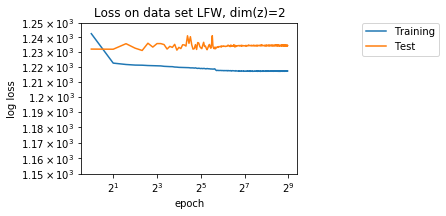

In [7]:
# Plotting train and test losses for all epochs
if dataset == "MNIST":
    plot_losses(solver, (90, 210, 10))
if dataset == "FF":
    plot_losses(solver, (330, 410, 10))
if dataset == "LFW":
    plot_losses(solver, (1150, 1260, 10))

epoch: 1, mu(z): 0.0088, stddev(z): 1.3095, var(z): 1.7148, var(mu(z)): 1.5984 E[var(q(z|x)]: 16.2065
epoch: 125, mu(z): 0.0001, stddev(z): 0.9313, var(z): 0.8673, var(mu(z)): 0.8488 E[var(q(z|x)]: 0.0003
epoch: 250, mu(z): -0.0022, stddev(z): 0.9306, var(z): 0.8660, var(mu(z)): 0.8479 E[var(q(z|x)]: 0.0003
epoch: 500, mu(z): -0.0011, stddev(z): 0.9294, var(z): 0.8637, var(mu(z)): 0.8474 E[var(q(z|x)]: 0.0003


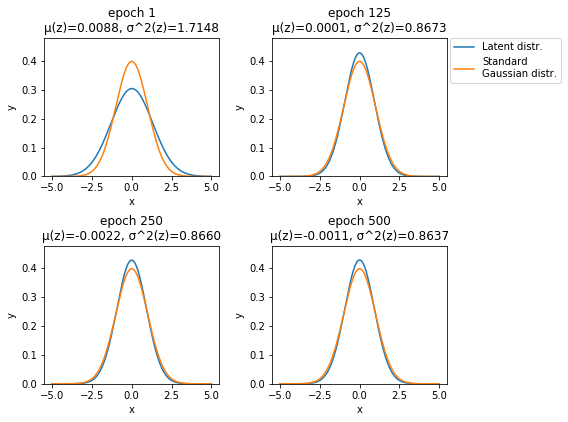

In [8]:
# Plotting histogram of the latent space's distribution, given the computed \mu and \sigma
plot_gaussian_distributions(solver)

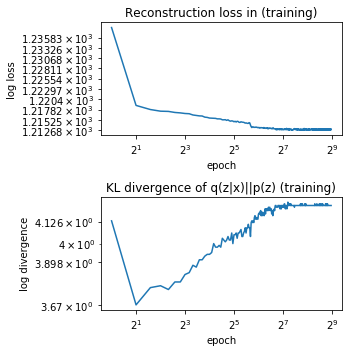

In [16]:
# Monitoring the reconstruction loss (likelihood lower bound) and KL divergence
DEBUG = 0
if DEBUG:
    for epoch, train_loss, test_loss, rl, kl in zip(solver.train_loss_history["epochs"], \
                             solver.train_loss_history["train_loss_acc"], \
                             solver.test_loss_history, \
                             solver.train_loss_history["recon_loss_acc"], \
                             solver.train_loss_history["kl_diverg_acc"]):
        print("epoch: {}, train_loss: {:.2f}, test_loss: {:.2f}, recon. loss: {:.2f}, KL div.: {:.2f}".format(
            epoch, train_loss, test_loss, rl, kl))
        print("overfitting: {:.2f}".format(abs(test_loss-train_loss)))
if dataset == "MNIST" and z_dim == 2:
    plot_rl_kl(solver, 100, 250)
if dataset == "MNIST" and z_dim == 20:
    plot_rl_kl(solver, 400, 300)
if dataset == "FF" and z_dim == 2:
    plot_rl_kl(solver, 10, 15)
if dataset == "LFW" and z_dim == 2:
    plot_rl_kl(solver, 50, 200)
if dataset == "LFW" and z_dim == 20:
    plot_rl_kl(solver, 50, 50)

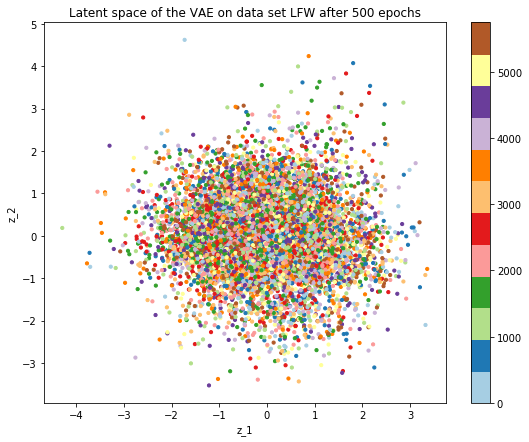

In [22]:
# visualize q(z|x) (latent space z)
if solver.z_dim == 2:
    if solver.loader.dataset != "FF":
        plot_latent_space(solver)
    else:
        plot_latent_space_no_labels(solver)
else:
    print("Plot of latent space not possible as dimension of z is not 2")

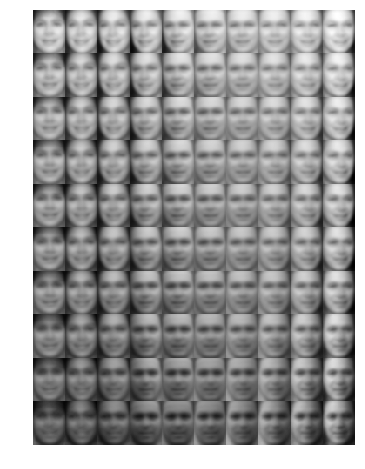

In [23]:
# Visualizations of learned data manifold for generative models with two-dimensional latent space
if solver.z_dim == 2:
    if solver.loader.dataset == "MNIST":
        plot_latent_manifold(solver, "bone")
    if solver.loader.dataset == "LFW" or solver.loader.dataset == "FF":
        plot_latent_manifold(solver, "gray", n=10, fig_size=(10, 8))
else:
    print("Plot is not possible as dimension of z is not 2")

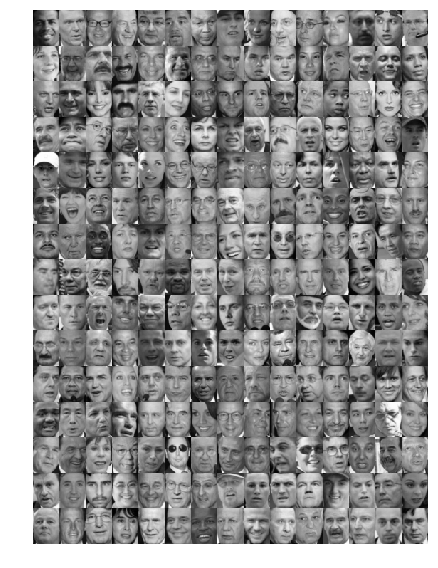

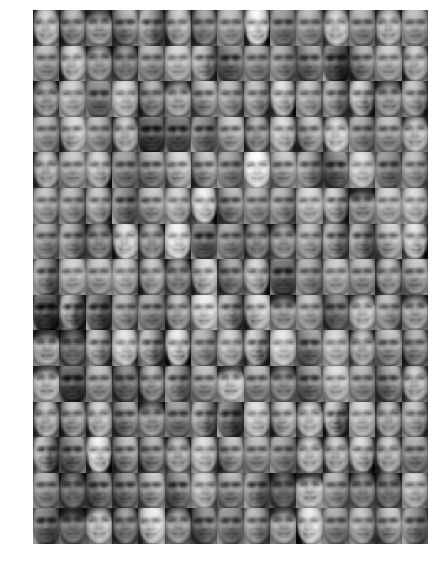

In [24]:
# plots real faces and in grid samples
if dataset == "LFW" or dataset == "FF":
    plot_faces_grid(225, 15, solver)
    plot_faces_samples_grid(225, 15, solver)

In [25]:
last_train_loss = solver.train_loss_history["train_loss_acc"][-1]
torch.save(solver, "../models/VAE_" + solver.loader.dataset + "_train_loss=" + "{0:.2f}".format(last_train_loss) + "_z=" + str(solver.z_dim) + ".pt")